In [2]:
# relevant imports

# base
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# data prep
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from scipy import stats

# nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# !pip install seaborn
import seaborn as sn
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# uncomment !pip install commands if you get an error

In [3]:
# import data
df = pd.read_csv("./ks-projects-201801.csv")

In [39]:
df.shape

(378661, 16)

In [19]:
# number of campaigns to begin with
orig_num_campaigns = len(df)

378661


In [36]:
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,state_string
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,failed
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,failed
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,failed
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,failed
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,canceled
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,successful
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,successful
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,failed
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,canceled
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,canceled


In [20]:
# keep only campaigns that were successful or failed
df1 = df
df1['state_string'] = [str(state) for state in df1['state']]
df1 = df1[(df.state_string == 'successful') | (df1.state_string == 'failed')]
df1 = df1.drop(['state_string'], axis=1)

In [21]:
# number of campaigns either successful or failed
new_num_campaigns = len(df1)

331675


In [28]:
print("Number of Campaigns before filtering for successful/failed: ", orig_num_campaigns)
print("Number of Campaigns after filtering for successful/failed: ", new_num_campaigns)
print("% of data lost: ", abs(new_num_campaigns - orig_num_campaigns)/orig_num_campaigns*100)

Number of Campaigns before filtering for successful/failed:  378661
Number of Campaigns after filtering for successful/failed:  331675
% of data lost:  12.408460337874775


Text(0,0.5,'Number of Campaigns')

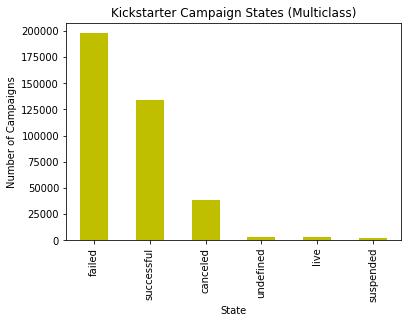

In [32]:
ax1 = df['state'].value_counts().plot(kind='bar', title="Kickstarter Campaign States (Multiclass)", color='y')
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Campaigns')

Text(0,0.5,'Number of Campaigns')

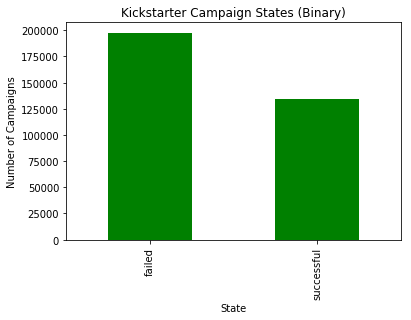

In [33]:
ax2 = df1['state'].value_counts().plot(kind='bar', title="Kickstarter Campaign States (Binary)", color='g')
ax2.set_xlabel('State')
ax2.set_ylabel('Number of Campaigns')

Text(0,0.5,'Number of Campaigns')

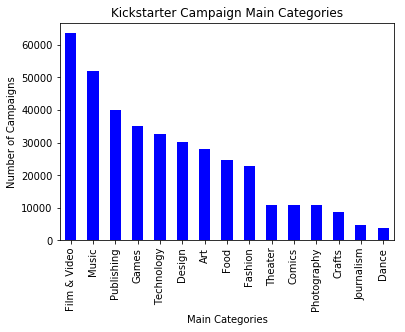

In [35]:
ax3 = df['main_category'].value_counts().plot(kind='bar', title="Kickstarter Campaign Main Categories", color='b')
ax3.set_xlabel('Main Categories')
ax3.set_ylabel('Number of Campaigns')

In [ ]:
# import feature data - make sure csv files are in the same directory
x_train = pd.read_csv("./x_train.csv")
x_val = pd.read_csv("./x_val.csv")

In [ ]:
# import state data => no header, so you have to specify header=None
y_train = pd.read_csv("./y_train.csv", header=None)
y_val = pd.read_csv("./y_val.csv", header=None)

In [ ]:
unique, counts = np.unique(y_val, return_counts=True)
print("y_val states and counts")
print(unique[0] + ": " + str(counts[0]))
print(unique[1] + ": " + str(counts[1]))

In [ ]:
# majority classification
print(type(y_val[0]))